In [2]:
from pymatgen.ext.matproj import MPRester
from numpy import * 
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from pymatgen.analysis.diffraction import xrd
from matplotlib import pyplot as plt
from pymatgen.analysis.diffraction.core import AbstractDiffractionPatternCalculator

with MPRester("73pliZvNbI25Rdqk") as m:
    structure = m.get_structure_by_material_id("mp-1023935")
    structure.to(filename="Te2Mo_xrd.cif")

In [16]:
st =  SpacegroupAnalyzer(structure).get_primitive_standard_structure()
x = xrd.XRDCalculator(wavelength='CuKa')
pattern = x.get_pattern(st, scaled=True, two_theta_range=None)
picTheta = pattern.x[0:3]
picInt = pattern.y[0:3]
hkl = pattern.hkls[0:7]

print("les 3 angles 2*\u03B8 associés au 3 premiers pics sont",picTheta)
print("les 3 intensités associés au 3 premiers pics sont",picInt)

for i in range(len(picTheta)):
    print("")
    print("Pic ",i+1," : ")
    print("")
    print("2*\u03B8 = ",round(picTheta[i],3),"°")
    print("Intensité = ",round(picInt[i],3),"%")
    print("Indices hkl et multiplicité =",hkl[i])


les 3 angles 2*θ associés au 3 premiers pics sont [ 5.0001329  10.00981771 15.03877183]
les 3 intensités associés au 3 premiers pics sont [1.00000000e+02 7.67174990e+00 1.59258172e-02]

Pic  1  : 

2*θ =  5.0 °
Intensité =  100.0 %
Indices hkl et multiplicité = [{'hkl': (0, 0, 0, 1), 'multiplicity': 2}]

Pic  2  : 

2*θ =  10.01 °
Intensité =  7.672 %
Indices hkl et multiplicité = [{'hkl': (0, 0, 0, 2), 'multiplicity': 2}]

Pic  3  : 

2*θ =  15.039 °
Intensité =  0.016 %
Indices hkl et multiplicité = [{'hkl': (0, 0, 0, 3), 'multiplicity': 2}]


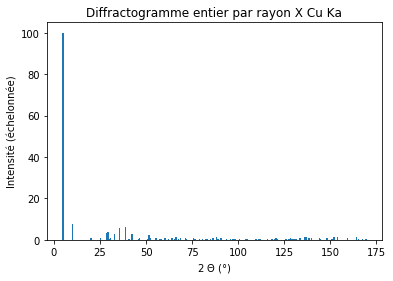

In [17]:
plt.figure()
plt.bar(pattern.x,pattern.y)
plt.title("Diffractogramme entier par rayon X Cu Ka")
plt.xlabel("2 $\Theta$ (°)")
plt.ylabel("Intensité (échelonnée)")
plt.show()

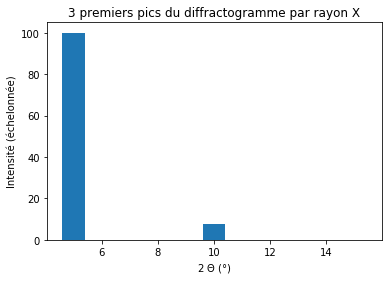

On observe que la valeur du 3ème pic est trop faible pour apparaitre clairement sur la figure.


In [5]:
plt.figure()
plt.bar(picTheta,picInt)
plt.title("3 premiers pics du diffractogramme par rayon X Cu Ka")
plt.xlabel("2 $\Theta$ (°)")
plt.ylabel("Intensité (échelonnée)")
plt.show()
print("On observe que la valeur du 3ème pic est trop faible pour apparaitre clairement sur la figure.")